### Project -  Credit Card Customer Segmentation

In this project we are going to use a dataset containing information about the clients of a company and our goal is to help segment them into different groups in order to apply different business strategies for each type of customer. We will use the  K-means algorithm to segment the data. In the end we are expected to deliver a group for each client and an explanation of the characteristics of each group and the main points that make them different.

In order to use the algorithm properly and achieve all the goals presented above we'll go through the following steps:

* Analyze the dataset;
* Prepare the data for modeling;
* Find an appropriate number of clusters;
* Segment the data;
* Interpret and explain the results.

![Image](https://images.unsplash.com/photo-1587740896339-96a76170508d?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1071&q=80)
_Photo by Elena Mozhvilo on Unsplash_

Here's the data dictionary:

* `customer_id`: unique identifier for each customer.
* `age`: customer age in years.
* `gender`: customer gender (M or F).
* `dependent_count`: number of dependents of each customer.
* `education_level`: level of education ("High School", "Graduate", etc.).
* `marital_status`: marital status ("Single", "Married", etc.).
* `estimated_income`: the estimated income for the customer projected by the data science team.
* `months_on_book`: time as a customer in months.
* `total_relationship_count`: number of times the customer contacted the company.
* `months_inactive_12_mon`: number of months the customer did not use the credit card in the last 12 months.
* `credit_limit`: customer's credit limit.
* `total_trans_amount`: the overall amount of money spent on the card by the customer.
* `total_trans_count`: the overall number of times the customer used the card.
* `avg_utilization_rati`o: daily average utilization ratio.

### Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
customers=pd.read_csv("C:/Users/Denisa/Desktop/Project Apps/project 18/customer_segmentation.csv")

In [3]:
customers.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


In [4]:
customers.shape

(10127, 14)

In [5]:
customers.dtypes

customer_id                   int64
age                           int64
gender                       object
dependent_count               int64
education_level              object
marital_status               object
estimated_income              int64
months_on_book                int64
total_relationship_count      int64
months_inactive_12_mon        int64
credit_limit                float64
total_trans_amount            int64
total_trans_count             int64
avg_utilization_ratio       float64
dtype: object

There are 14 columns in the dataset including `customer_id`, which is not going to be needed for the segmentation.

Of the 13 columns left, there are 8 columns containing integers, 2 containing floats, and 3 columns containing strings, which means we have 3 categorical columns to deal with.

In [6]:
customers.isnull().sum()

customer_id                 0
age                         0
gender                      0
dependent_count             0
education_level             0
marital_status              0
estimated_income            0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
credit_limit                0
total_trans_amount          0
total_trans_count           0
avg_utilization_ratio       0
dtype: int64

There are no missing values

#### Correlation between the columns

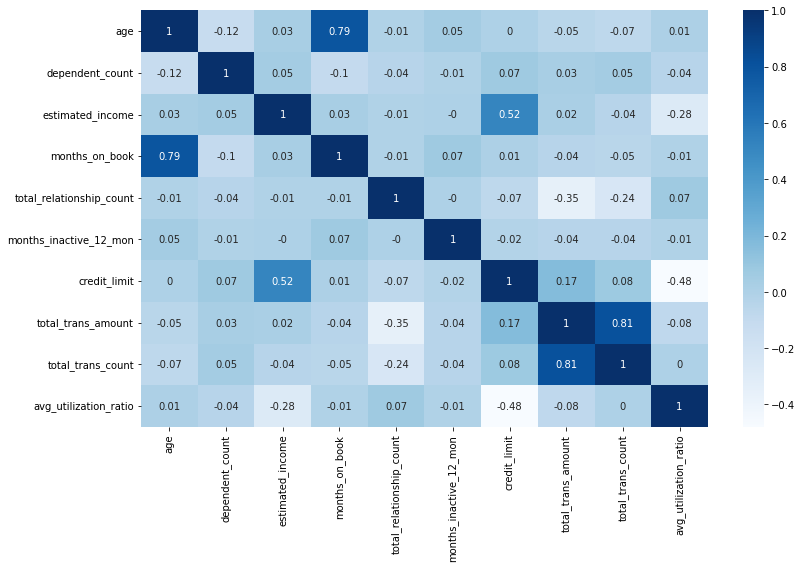

In [7]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(round(customers.drop('customer_id', axis=1).corr(), 2), cmap='Blues', annot=True, ax=ax)

plt.tight_layout()
plt.show()

* Age is strongly correlated with how long the person has been a customer (months_on_book);
* Credit limit is positively correlated with the estimated income and negatively correlated with the average utilization ratio;
* The total number of transactions (total_trans_count) is strongly correlated with the total amount transitioned (total_trans_amount).

#### Distribution of each numeric column

C:\Users\Denisa\AppData\Local\Temp/ipykernel_45644/4252282034.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  customers.drop('customer_id', axis=1).hist(ax=ax)


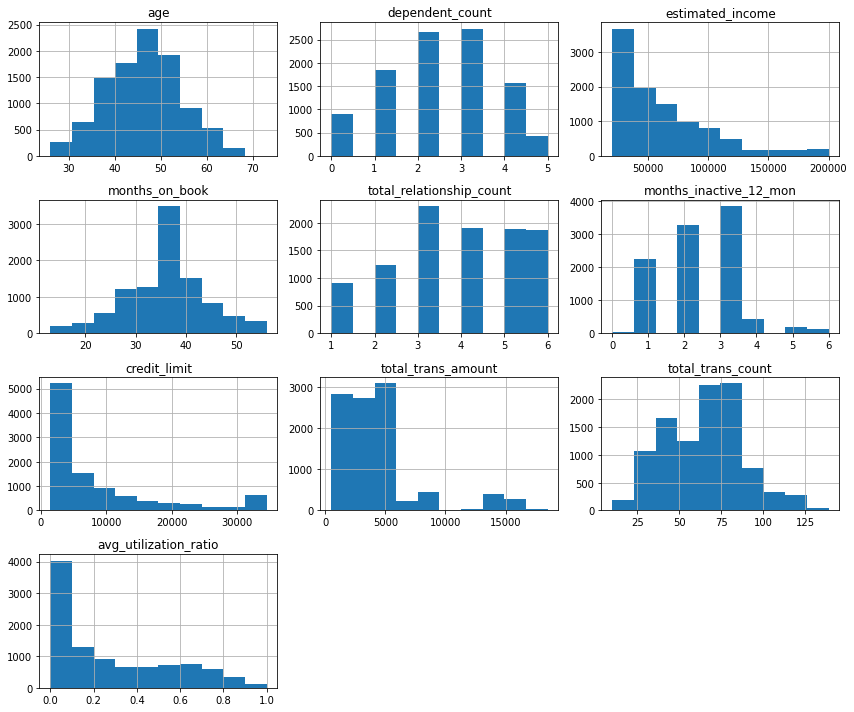

In [8]:
fig, ax = plt.subplots(figsize=(12, 10))

#Removing the customer's id before plotting the distributions
customers.drop('customer_id', axis=1).hist(ax=ax)

plt.tight_layout()
plt.show()

### Feature Engineering

Next we will deal with the categorical columns: gender, education level, and marital status.

In [9]:
for col in ['gender', 'education_level', 'marital_status']:
    print(col)
    print(customers[col].value_counts(), end='\n\n')

gender
F    5358
M    4769
Name: gender, dtype: int64

education_level
Graduate         3685
High School      2351
Uneducated       1755
College          1192
Post-Graduate     616
Doctorate         528
Name: education_level, dtype: int64

marital_status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: marital_status, dtype: int64



The `gender` column contains only 2 unique values, "M" and "F", which means it's possible to replace all the rows with 1 and 0.

In [10]:
customers_modif = customers.copy()
customers_modif['gender'] = customers['gender'].apply(lambda x: 1 if x == 'M' else 0)
customers_modif.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,1,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,0,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,1,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,0,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,1,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


The `education_level` column contains 6 unique values. This column represents levels of education, and it's possible to rank the levels from the lowest to the highest, so it's possible to replace each unique level with a number, assuming we respect the order.

In [11]:
customers_modif.replace(to_replace={'Uneducated': 0, 'High School': 1, 'College':2,
                                    'Graduate': 3, 'Post-Graduate': 4, 'Doctorate':5}, inplace=True)
customers_modif['education_level'].head()

0    1
1    3
2    3
3    1
4    0
Name: education_level, dtype: int64

For the `marital_status` column we'll use one-hot-encoding to create dummy variables from this column.

In [12]:
dummies = pd.get_dummies(customers_modif[['marital_status']], drop_first=True)

customers_modif = pd.concat([customers_modif, dummies], axis=1)
customers_modif.drop(['marital_status'], axis=1, inplace=True)

customers_modif.head()

,customer_id,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Married,marital_status_Single,marital_status_Unknown
0,768805383,45,1,3,1,69000,39,5,1,12691.0,1144,42,0.061,1,0,0
1,818770008,49,0,5,3,24000,44,6,1,8256.0,1291,33,0.105,0,1,0
2,713982108,51,1,3,3,93000,36,4,1,3418.0,1887,20,0.000,1,0,0
3,769911858,40,0,4,1,37000,34,3,4,3313.0,1171,20,0.760,0,0,1
4,709106358,40,1,3,0,65000,21,5,1,4716.0,816,28,0.000,1,0,0


### Scaling the Data

We have different scaled data across the DataFrame. The `estimated_income`, for instance, contains numbers in the range of dozens and hundreds of thousands, while the `dependent_count` column contains numbers from 1 to 5.

At this point of the project we need to transform the data so it's all on the same scale.

In [13]:
X = customers_modif.drop('customer_id', axis=1)

scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)
X_scaled[:5]

array([[-0.16540558,  1.05995565,  0.50336813, -0.75221102,  0.1758098 ,
         0.38462088,  0.76394261, -1.32713603,  0.4466219 , -0.95970657,
        -0.97389518, -0.77588223,  1.07733799, -0.79850685, -0.28260887],
       [ 0.33357038, -0.9434357 ,  2.04319867,  0.66278684, -0.96716585,
         1.01071482,  1.40730617, -1.32713603, -0.04136665, -0.91643261,
        -1.35734038, -0.61627565, -0.92821381,  1.2523374 , -0.28260887],
       [ 0.58305837,  1.05995565,  0.50336813,  0.66278684,  0.78539682,
         0.00896451,  0.12057905, -1.32713603, -0.5736978 , -0.74098169,
        -1.91120566, -0.99715499,  1.07733799, -0.79850685, -0.28260887],
       [-0.78912553, -0.9434357 ,  1.2732834 , -0.75221102, -0.63697289,
        -0.24147306, -0.52278451,  1.64147829, -0.58525108, -0.95175829,
        -1.91120566,  1.75968594, -0.92821381, -0.79850685,  3.53845931],
       [-0.78912553,  1.05995565,  0.50336813, -1.45970995,  0.07421197,
        -1.86931731,  0.76394261, -1.32713603, 

### Choosing K

The next step is to decide the best number of clusters to use in the segmentation according to the inertia metric.
We'll create several models and compute the inertia from each of them. Then, we'll plot the Elbow Curve and decide the number of clusters we'll use to segment the customers.

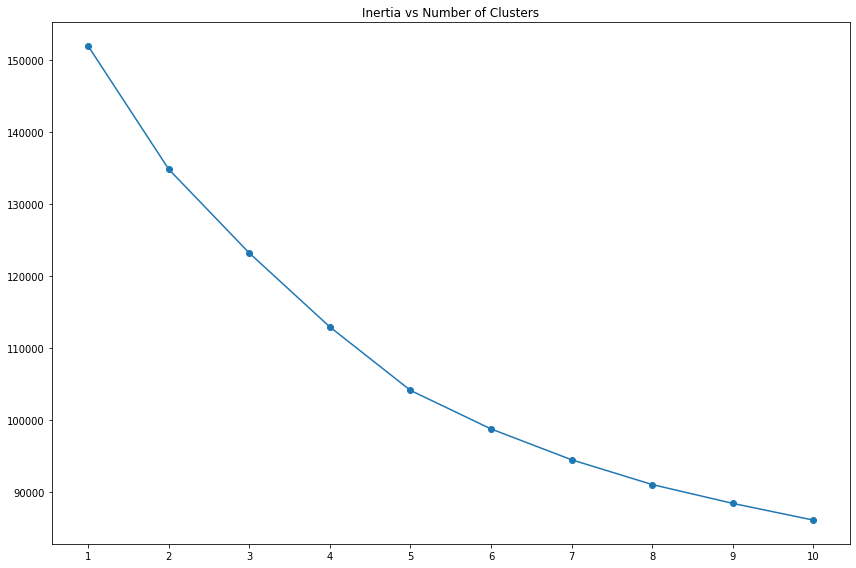

In [14]:
X = pd.DataFrame(X_scaled)
inertias = []

for k in range(1, 11):
    model = KMeans(n_clusters=k, n_init=10)
    y = model.fit_predict(X)
    inertias.append(model.inertia_)
    
plt.figure(figsize=(12, 8))
plt.plot(range(1, 11), inertias, marker='o')
plt.xticks(ticks=range(1, 11), labels=range(1, 11))
plt.title('Inertia vs Number of Clusters')

plt.tight_layout()
plt.show()


It looks like the rate of decreasing of the inertia slows down between 5 and 7 clusters. We'll use 6 clusters to move on.

In [15]:
model = KMeans(n_clusters=6, n_init=10)
y = model.fit_predict(X_scaled)

y

array([1, 3, 1, ..., 2, 4, 2])

### Analyzing Results

Finally we will create a new column called `CLUSTER` in the original customers DataFrame. This column should contain the cluster assigned to each customer by the algorithm.

In [16]:
customers['CLUSTER'] = y + 1
customers

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,CLUSTER
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061,2
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105,4
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000,2
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760,5
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,M,2,Graduate,Single,51000,40,3,2,4003.0,15476,117,0.462,6
10123,710638233,41,M,2,Graduate,Divorced,40000,25,4,2,4277.0,8764,69,0.511,3
10124,716506083,44,F,1,High School,Married,33000,36,5,3,5409.0,10291,60,0.000,3
10125,717406983,30,M,2,Graduate,Unknown,47000,36,4,3,5281.0,8395,62,0.000,5


In [23]:
customers['CLUSTER'].value_counts().sort_values(ascending=False)

3    2771
4    2486
2    1781
1    1439
6     916
5     734
Name: CLUSTER, dtype: int64

We can see that cluster 3 is the largest while cluster 5 is the smallest.

To understand the data better we will group each numeric variable by the CLUSTER column and plot a bar chart to analyze the clusters' characteristics regarding each variable.

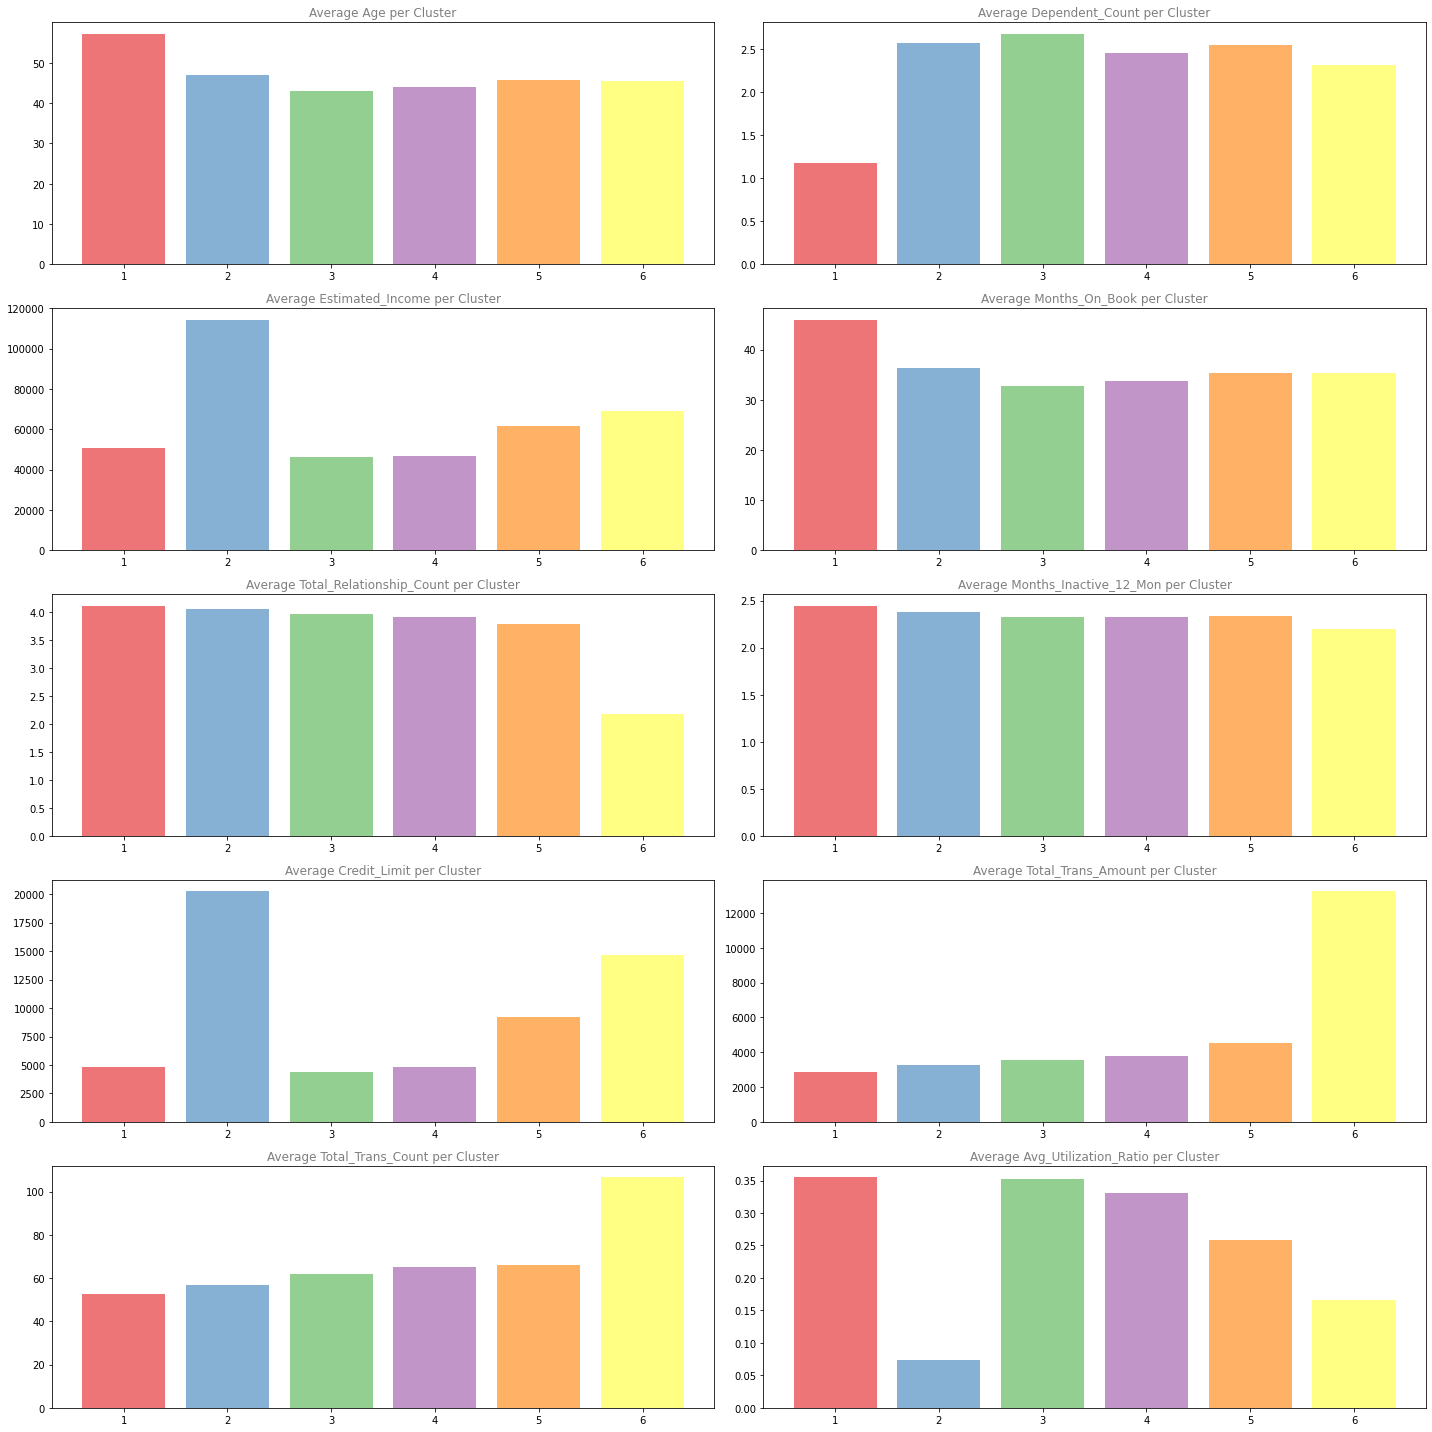

In [29]:
numeric_columns = customers.select_dtypes(include=np.number).drop(['customer_id', 'CLUSTER'], axis=1).columns

fig = plt.figure(figsize=(20, 20))
for i, column in enumerate(numeric_columns):
    df_plot = customers.groupby('CLUSTER')[column].mean()
    ax = fig.add_subplot(5, 2, i+1)
    ax.bar(df_plot.index, df_plot, color=sns.color_palette('Set1'), alpha=0.6)
    ax.set_title(f'Average {column.title()} per Cluster', alpha=0.5)
    ax.xaxis.grid(False)
    
plt.tight_layout()
plt.show()

For those numerical variables with higher correlations we saw earlier, we can also use a scatter plot to visualize this correlation grouped by clusters and analyze how the clusters change between each area of the chart.

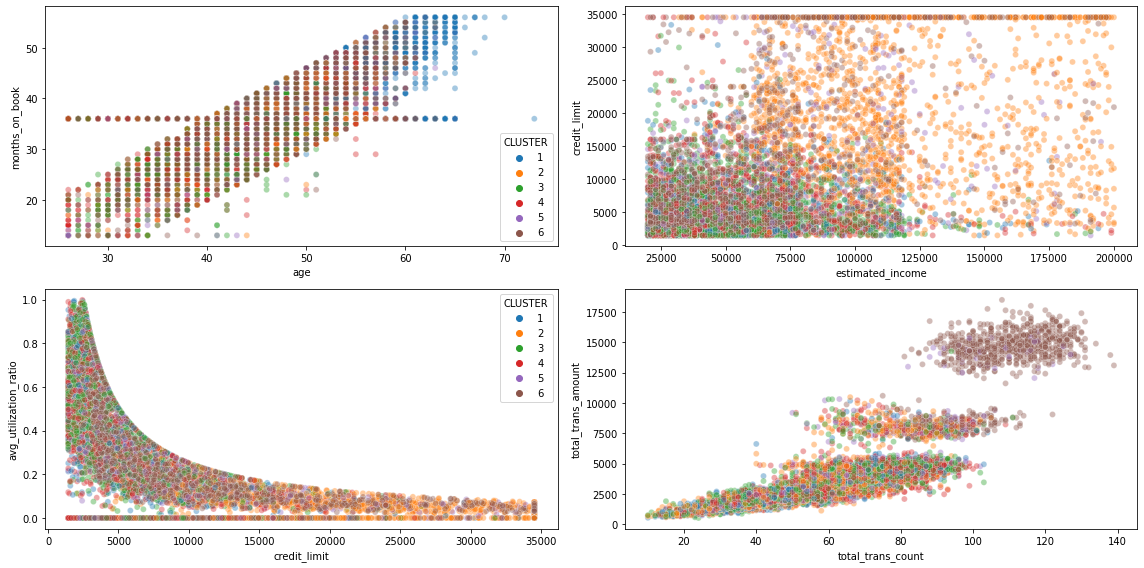

In [19]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 8))
sns.scatterplot(x='age', y='months_on_book', hue='CLUSTER', data=customers, palette='tab10', alpha=0.4, ax=ax1)
sns.scatterplot(x='estimated_income', y='credit_limit', hue='CLUSTER', data=customers, palette='tab10', alpha=0.4, ax=ax2, legend=False)
sns.scatterplot(x='credit_limit', y='avg_utilization_ratio', hue='CLUSTER', data=customers, palette='tab10', alpha=0.4, ax=ax3)
sns.scatterplot(x='total_trans_count', y='total_trans_amount', hue='CLUSTER', data=customers, palette='tab10', alpha=0.4, ax=ax4, legend=False)

plt.tight_layout()
plt.show()

Some early conclusions considering only the numeric variables are that Cluster 1 has the highest amount of money transitioned, while Cluster 2 has the lowest credit limit and estimated income and the highest utilization rate. Cluster 4 has the highest credit limit. Older clients are grouped in Cluster 5.

Next we will calculate the percentual distribution of each variable per cluster for the categorical columns (using a stacked bar chart).

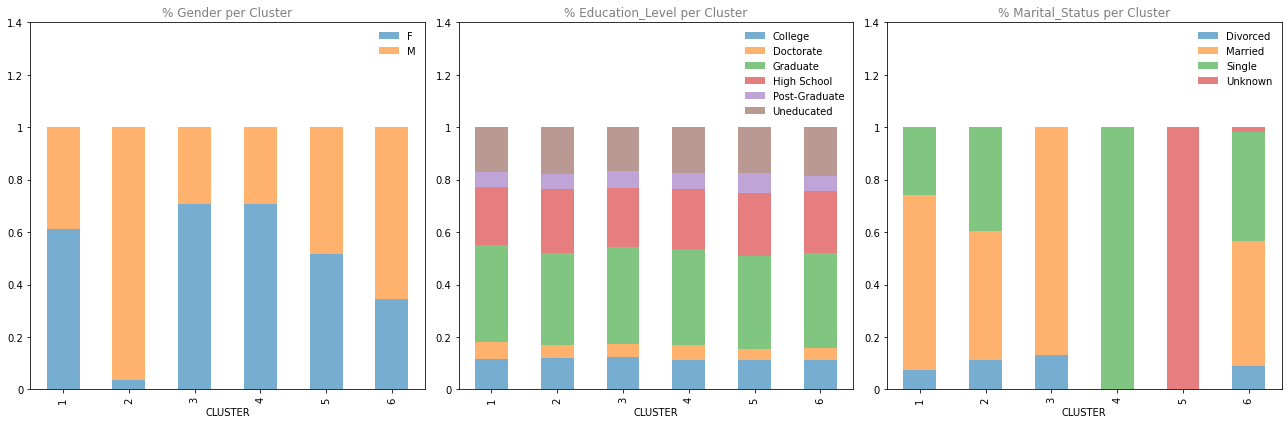

In [20]:
cat_columns = customers.select_dtypes(include=['object'])

fig = plt.figure(figsize=(18, 6))
for i, col in enumerate(cat_columns):
    plot_df = pd.crosstab(index=customers['CLUSTER'], columns=customers[col], values=customers[col], aggfunc='size', normalize='index')
    ax = fig.add_subplot(1, 3, i+1)
    plot_df.plot.bar(stacked=True, ax=ax, alpha=0.6)
    ax.set_title(f'% {col.title()} per Cluster', alpha=0.5)

    ax.set_ylim(0, 1.4)
    ax.legend(frameon=False)
    ax.xaxis.grid(False)
    ax.set_xticks(ax.get_xticks().tolist())
    ax.set_yticks(ax.get_yticks().tolist())
    labels = [0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4]
    
    ax.set_yticklabels(labels)

plt.tight_layout()
plt.show()

Considering the categorical variables, we notice that the education level is well divided between clusters.

In regard to the marital status, Cluster 3 is composed almost entirely of married people, while we don't know the marital status of anybody in Cluster 5. Cluster 2 is almost completely male and Cluster 4 is 100% made of single people.

### Conclusions about each cluster

In [21]:
# List of customers and clusters
customers[['customer_id', 'CLUSTER']]

,customer_id,CLUSTER
0,768805383,2
1,818770008,4
2,713982108,2
3,769911858,5
4,709106358,3
...,...,...
10122,772366833,6
10123,710638233,3
10124,716506083,3
10125,717406983,5


### __Cluster 1__

__Characteristics:__ Gender balanced divided, mostly married; low credit limit; low amount transitioned; low number of transactions; high utilization rate, low income, low depndent count.

__Insight:__ Low credit limit and transactions, but use the card very often. Could receive benefits to spend more money.


### __Cluster 2__
__Characteristics:__ Mostly men; mostly married; high estimated income; high credit limit; low amount transitioned; low utilization rate.

__Insight:__ High income and credit limits, but don't use the card. Could be incentivized to use it.


### __Cluster 3__
__Characteristics:__ Mostly married women; low credit limit, high utilization rate; largest cluster, low amount transitioned, low income.

__Insight:__ Low credit limit and transactions, but use the card very often. Could receive benefits to spend more money.

### __Cluster 4__
__Characteristics:__ Mostly single women, with low estimated income, low credit limit; low amount transitioned; high utilization rate.

__Insight:__ Low credit limit and transactions, but use the card very often. Could receive benefits to spend more money.

### __Cluster 5__
__Characteristics:__ Gender balanced divided, unknown marital status, high age, long time customers, low credit limit, low amount transitioned, high utilization rate.

__Insight:__ Low credit limit and transactions, but use the card very often. Could receive benefits to spend more money.

### __Cluster 6__
__Characteristics:__ Mostly men, married or single;  high credit limit, high amount transitioned, low utilization rate, high transactional count.

__Insight:__ High income and credit limits, but don't use the card. Could be incentivized to use it.